In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox, ttest_ind, spearmanr
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer

# Welch's Test For Hypo 1

In [ ]:
train = pd.read_csv('combined_train.csv')
val = pd.read_csv('combined_val.csv')
test = pd.read_csv('combined_test.csv')

In [ ]:
price = train.price
train_superhost_t = train[train['host_is_superhost'] == 't']
train_superhost_f = train[train['host_is_superhost'] == 'f']

print(price.shape, train_superhost_t.shape, train_superhost_f.shape)

(23097,) (4975, 54) (18122, 54)


In [ ]:
pricet,_= boxcox(train_superhost_t.price)
pricef,_=boxcox(train_superhost_f.price)

In [ ]:
ttest_ind(pricet, pricef, equal_var = False)

#reject, means not equal

Ttest_indResult(statistic=91.61210276917123, pvalue=0.0)

# Spearman For Hypo 2

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia = SentimentIntensityAnalyzer()
train['polarity'] = train['combined_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
#takes arnd 13 mins

In [ ]:
x = train['price'].values
y = train['polarity'].values

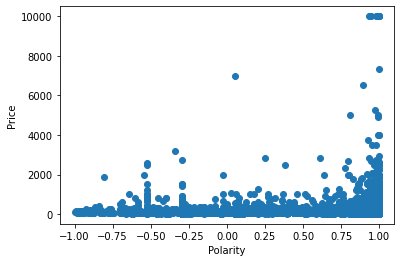

In [ ]:
plt.scatter(y, x)
plt.xlabel('Polarity')
plt.ylabel("Price")
plt.show()

In [ ]:
spearmanr(x, y)

SpearmanrResult(correlation=0.05050822868544489, pvalue=1.5837692410500415e-14)

# Spearman For Hypo 3

In [ ]:
sub_train = train[train['review_scores_rating'] > 0]

In [ ]:
x = sub_train['price'].values
y = sub_train['review_scores_rating'].values

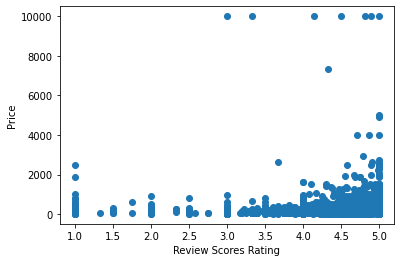

In [ ]:
plt.scatter(y, x)
plt.xlabel('Review Scores Rating')
plt.ylabel("Price")
plt.show()

In [ ]:
spearmanr(x, y)

SpearmanrResult(correlation=0.12636506413992835, pvalue=9.649841274708159e-63)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a92d0af-cecf-4cde-96f5-c3db3a7f88f1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>